<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Reconocimiento facial con K-medias y K-medoides

En este caso-taller vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos. 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


In [1]:
# LIBRERIAS

from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids 
from sklearn.metrics import silhouette_score

### 1.Carga de datos 

Los datos pueden ser bajados directamente utilizando la librería `scikit-learn`,  la función que le permite hacer esto es `fetch_olivetti_faces`. 

In [3]:
# Utilice este espacio para escribir el código.
# Cargar datos
oliveti_dataset = fetch_olivetti_faces(data_home="data")

Para obtener la base de datos se utilizó la función fetch_olivetti_faces de scikit-learn, la cual descarga automáticamente el conjunto.

### 2.  Análisis preliminar 

#### 2.1. Describa los contenidos de la base de datos, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

Claves del dataset:

In [4]:
oliveti_dataset.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

Se ejeucta un print de DESCR para tener más infomración acerca del conjunto de datos

In [5]:
print(oliveti_dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [6]:
print(oliveti_dataset.data.shape)  

(400, 4096)


In [7]:
print(oliveti_dataset.images.shape) 
print(len(oliveti_dataset.target)) 

(400, 64, 64)
400


In [8]:
oliveti_dataset.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [9]:
# Describir los contenidos de la base
print("Descripción de la base de datos oliveti_dataset:")
print(f" - Número total de imágenes: {oliveti_dataset.images.shape[0]}")
print(f" - Dimensiones de cada imagen: {oliveti_dataset.images.shape[1]} x {oliveti_dataset.images.shape[2]} píxeles")
print(f" - Número total de registros: {len(oliveti_dataset.target)}")
values, counts = np.unique(oliveti_dataset.target, return_counts=True)
print(f" - Ejemplo de registros en la base (id_persona, count):\n   - {list(zip(values[:5], counts[:5]))}")
print(f"    - Se tienen {len(values)} personas diferentes en la base con un total de {counts[0]} imágenes para cada uno.")
print(f" - Forma de la matriz de datos (imágenes aplanadas): {oliveti_dataset.data.shape}")
print(f" - Tipo de datos de las imágenes: {oliveti_dataset.images.dtype}")

Descripción de la base de datos oliveti_dataset:
 - Número total de imágenes: 400
 - Dimensiones de cada imagen: 64 x 64 píxeles
 - Número total de registros: 400
 - Ejemplo de registros en la base (id_persona, count):
   - [(0, 10), (1, 10), (2, 10), (3, 10), (4, 10)]
    - Se tienen 40 personas diferentes en la base con un total de 10 imágenes para cada uno.
 - Forma de la matriz de datos (imágenes aplanadas): (400, 4096)
 - Tipo de datos de las imágenes: float32


En esta sección, se realiza un análisis preliminar de la base de datos para comprender su estructura y contenido. Se exploran todos los keys y values de la base.

Se evidencian un total de 400 imagenes. Las dimensiones de cada imagen es 64x64 píxeles. El número de personas o clases presentes es 40. Se evidencian que cada persona tiene un total de 10 imagenes cada uno y el tipo de datos en las imagenes es float32.

Con esta descripción se tiene una introducción a entender los datos que se manejan en la base lo cual es clave para los pasos siguientes del notebook.

In [10]:
X = oliveti_dataset.data
X = pd.DataFrame(X)

y = pd.Series(oliveti_dataset.target)
y = pd.DataFrame(y, columns=['id'])

#df = X.join(y)
df = pd.concat([y, X], axis=1)
df.head()

,id,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


In [11]:
df['id'].value_counts().sort_index()

id
0     10
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
13    10
14    10
15    10
16    10
17    10
18    10
19    10
20    10
21    10
22    10
23    10
24    10
25    10
26    10
27    10
28    10
29    10
30    10
31    10
32    10
33    10
34    10
35    10
36    10
37    10
38    10
39    10
Name: count, dtype: int64

In [12]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.363079,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.164952,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.227273,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.484504,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


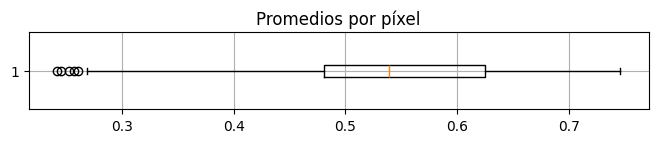

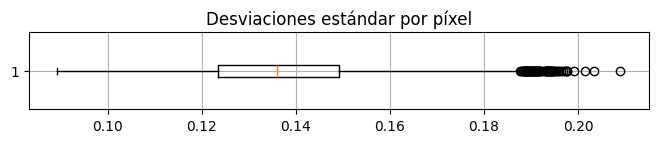

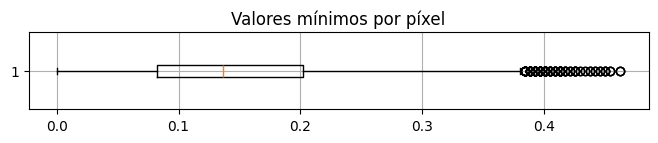

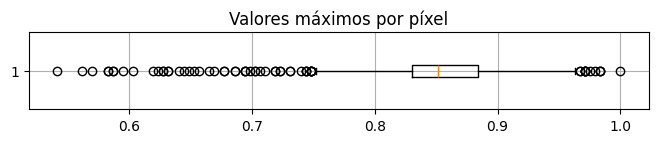

In [14]:
# Métricas por píxel
metricas = {
    "Promedios por píxel": X.mean(axis=0),
    "Desviaciones estándar por píxel": X.std(axis=0),
    "Valores mínimos por píxel": X.min(axis=0),
    "Valores máximos por píxel": X.max(axis=0),
}
for titulo, valores in metricas.items():
    plt.figure(figsize=(8, 1))
    plt.boxplot(valores, vert=False)
    plt.title(titulo)
    plt.grid(True)
    plt.show()


Usando la estadisticas de los datos se evidencia que el promediod e los pixeles está concentrado entre 0.48 y 0.62 que correspondena  la intensidad de los pixesles. Las desviaciones en general son muy bajas mostrando que hay baja variabilidad en los datos y que el rango de datos está entre 0 y 1. Se evidencian datos homogeneos a nivel general sin valores atípicos marcados.

#### 2.2. Genere una figura con una imágen de cada uno de los individuos

In [15]:
n_samples, h, w = oliveti_dataset.images.shape

In [ ]:
img = rostros.iloc[idx].to_numpy().reshape(h,w)

In [150]:
rostros.iloc[5]

0       0.714876
1       0.652893
2       0.706612
3       0.776860
4       0.723140
          ...   
4091         NaN
4092         NaN
4093         NaN
4094         NaN
4095         NaN
Name: 5, Length: 4096, dtype: float32

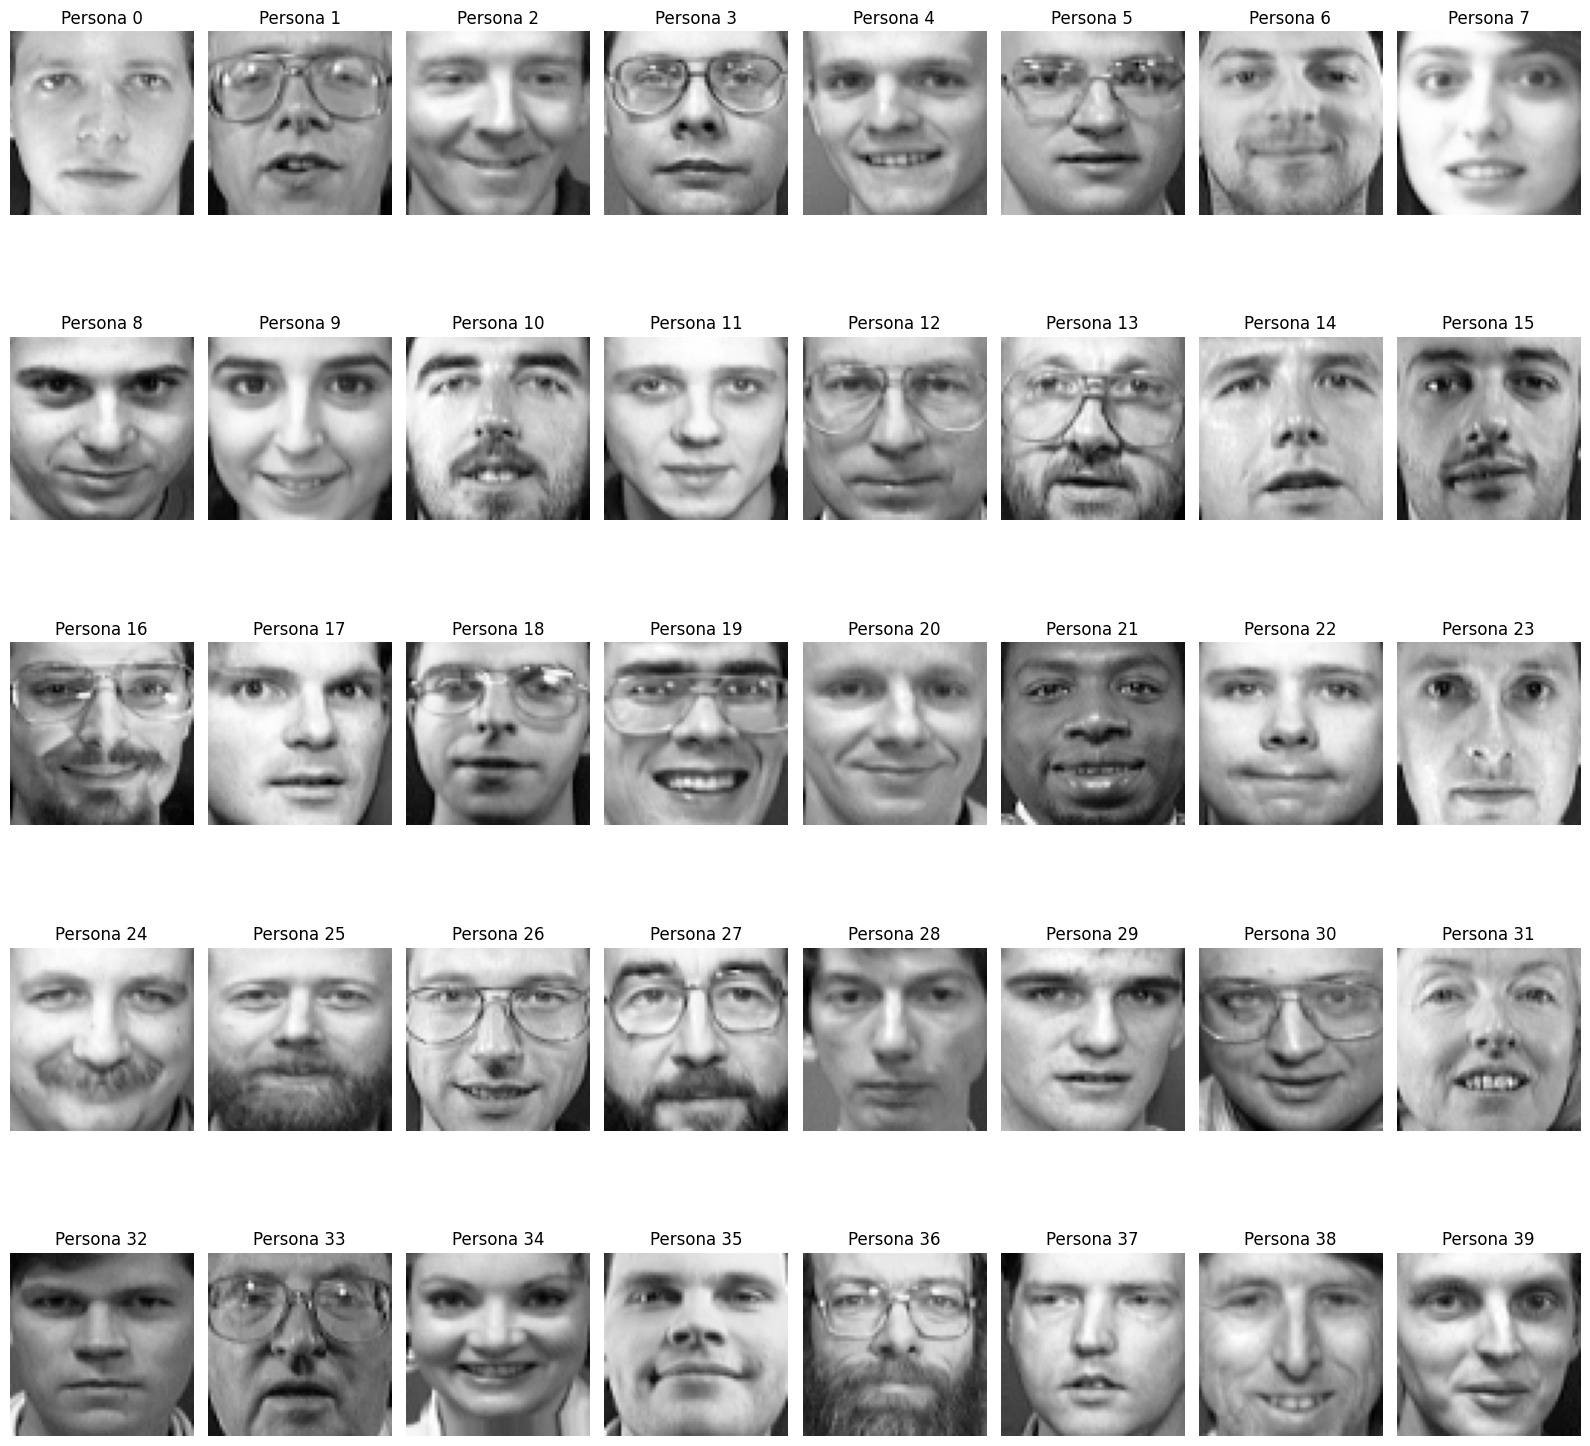

In [17]:
person = df['id'].unique()
rostros = []
plt.figure(figsize=(16, 16)) 

#Capturar rostro de cada persona e imprime
# Captura
for i in person:
    indice = df.index[df['id'] == i].tolist()
    r = X.values[indice[0]]
    rostros.append(r)

rostros = pd.DataFrame(rostros)  
# Imprime
for idx, i in rostros.iterrows():     
    plt.subplot(5, 8, idx+1)
    img = i.to_numpy().reshape(h,w)
    plt.imshow(img, cmap='gray')
    plt.title(f'Persona {idx}')
    plt.axis('off')
    plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()

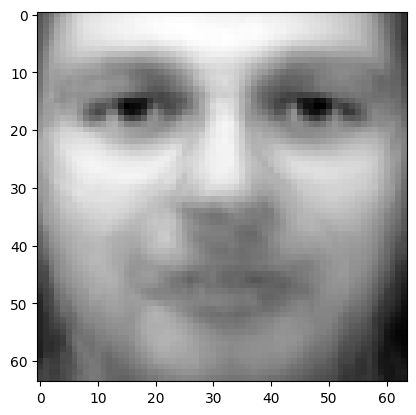

In [18]:
Xmean_dis = rostros.mean(axis=0)
plt.imshow(Xmean_dis.to_numpy().reshape((h, w)), cmap=plt.cm.gray)

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 2.3. Transforme las imágenes en un data frame donde cada columna contiene los valores estandarizados del nivel de gris en la imagen y una columna con la etiqueta de cada imagen. 

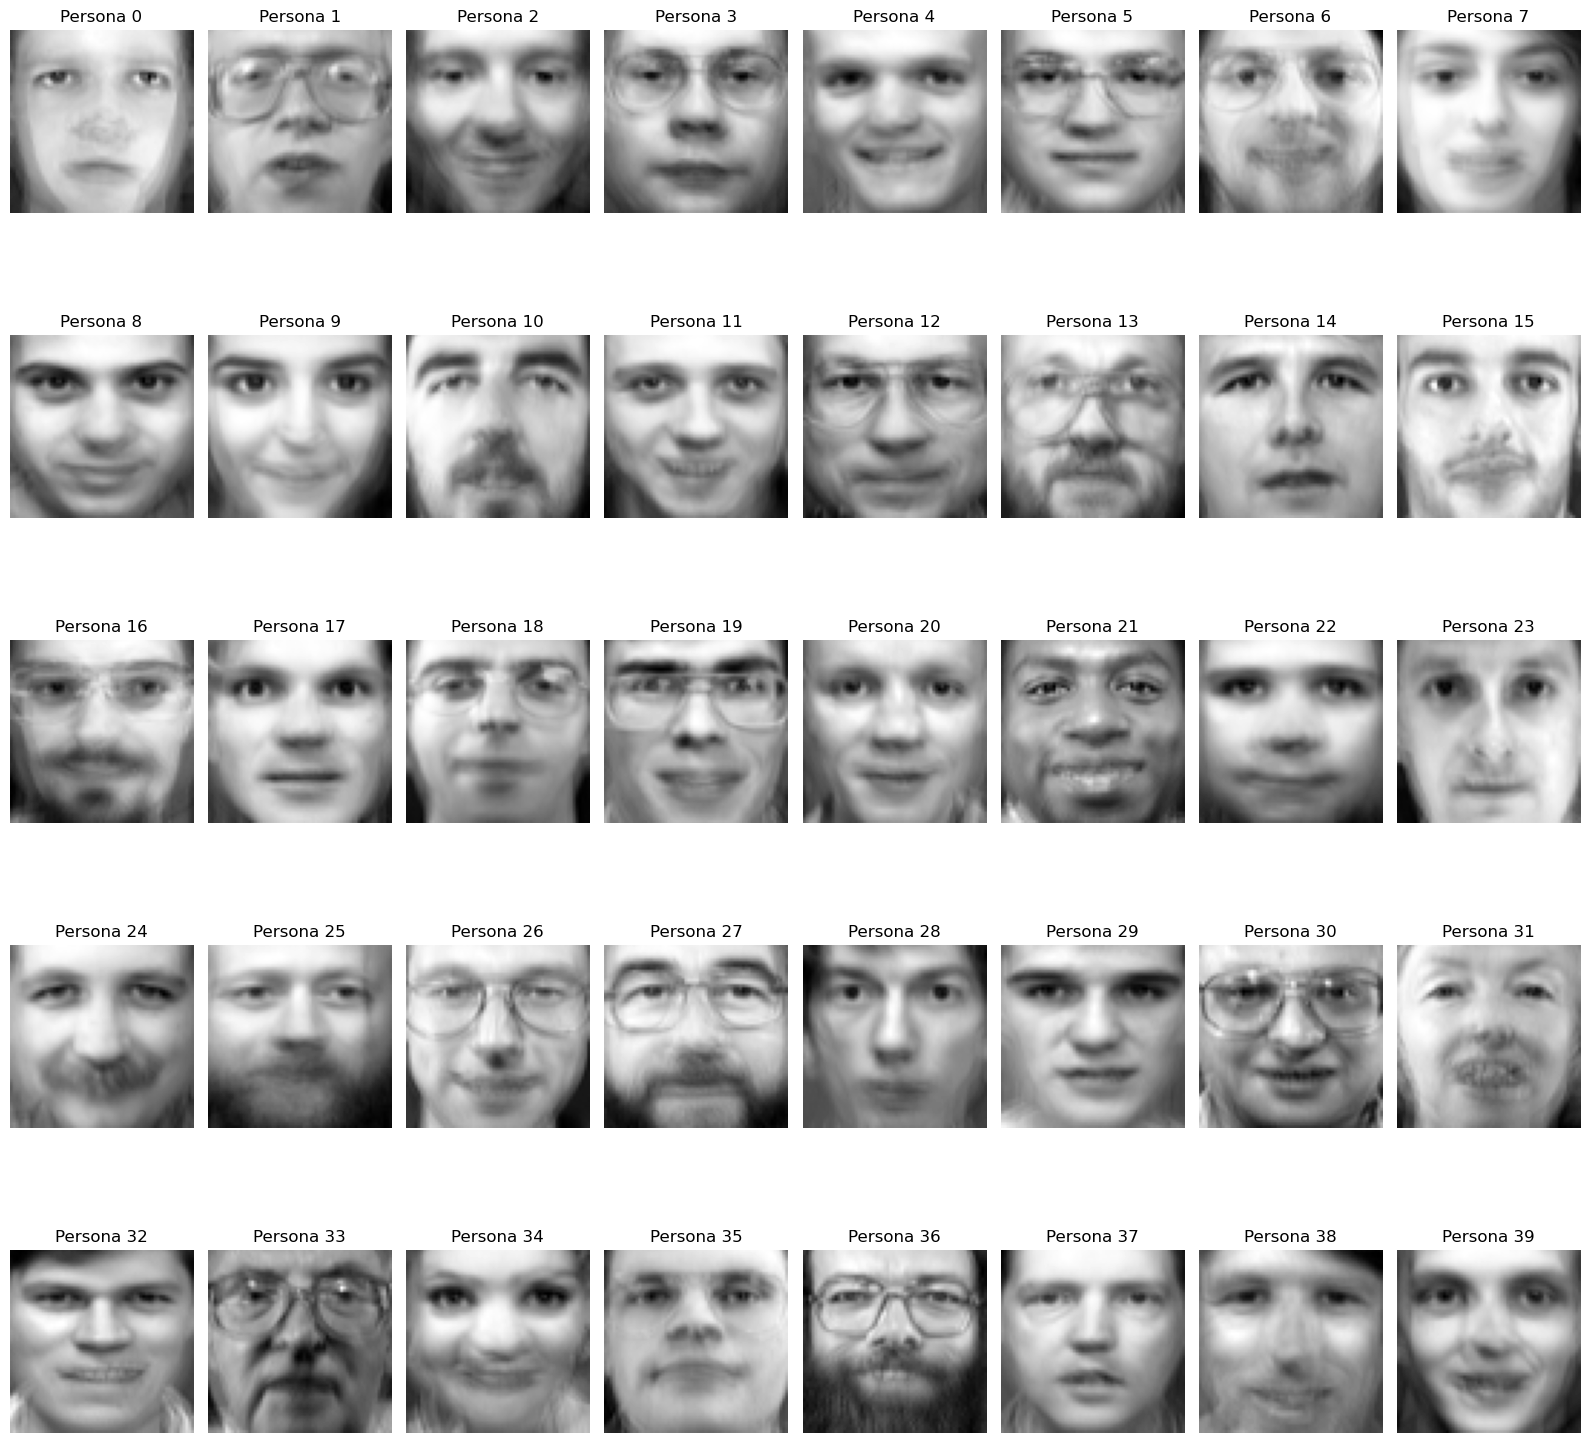

In [219]:
plt.figure(figsize=(16, 16)) 
Xmean_per = []
#Capturar rostro de cada persona e imprime
# Captura
for i in person:
    tmp_rostros = []
    indices = df.index[df['id'] == i].tolist()
    for j in indices:
        r_2 = X.values[j]
        tmp_rostros.append(r_2)
    tmp_rostros = pd.DataFrame(tmp_rostros)
    tmp_rostros = tmp_rostros.mean(axis=0)
    Xmean_per.append(tmp_rostros)
    
Xmean_per = pd.DataFrame(Xmean_per)  
# Imprime
for idx, i in Xmean_per.iterrows():     
    plt.subplot(5, 8, idx+1)
    img = i.to_numpy().reshape(h,w)
    plt.imshow(img, cmap='gray')
    plt.title(f'Persona {idx}')
    plt.axis('off')
    plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()

In [241]:
y_person = pd.DataFrame(person, columns=['id'])
df_mean = pd.concat([y_person, Xmean_per], axis=1)
df_mean.head()

,id,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0.341322,0.375620,0.416942,0.454959,0.497934,0.544628,0.583884,0.619008,0.643802,...,0.398347,0.390083,0.383884,0.347934,0.335124,0.301240,0.278512,0.275207,0.277686,0.276859
1,1,0.623967,0.645868,0.677686,0.697934,0.703306,0.707851,0.707438,0.713223,0.712810,...,0.414050,0.354132,0.294215,0.248347,0.206612,0.211157,0.200826,0.147934,0.125620,0.116116
2,2,0.378926,0.395041,0.419008,0.462810,0.504959,0.552066,0.602066,0.666116,0.713636,...,0.297107,0.306612,0.309504,0.307851,0.303306,0.303719,0.290909,0.292975,0.274793,0.268182
3,3,0.436777,0.478926,0.489669,0.500413,0.539669,0.571074,0.632231,0.691736,0.719008,...,0.373554,0.337190,0.344628,0.348347,0.352066,0.348760,0.319008,0.309917,0.297107,0.284711
4,4,0.496694,0.515289,0.565289,0.607851,0.647107,0.672314,0.689669,0.699587,0.707025,...,0.442562,0.443802,0.448760,0.450413,0.442149,0.424380,0.428512,0.411983,0.399587,0.395455


In [257]:
# Xmean_per: DataFrame con los rostros promedio
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # devuelve un ndarray estandarizado

Se usa la función StandardScaler() para realizar la estandarización de los datos y se almacena en la variable X_scaled que será usada como insumo para la clasificación no supervisada

### 3. Clasificando de forma no supervisada

En esta sección trataremos de clasificar las imágenes de los individuos de forma no supervisada. Para ello utilizaremos los algoritmos de k-medias y k-medoides. Dado que sabemos que el dataset consta de 40 personas diferentes, utilizaremos esta información para pedirle a los algoritmos que encuentren k=40 clusters y examinaremos su precisión.


#### 3.1. Implemente k-medias sobre los datos estandarizados en el punto anterior. Al implementar utilice  `random_state=123` y `n_init=10`. (Esto puede tomar mucho tiempo y requerir mucho RAM, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [259]:
kmeans_mean = KMeans(n_clusters = 40, random_state = 123, n_init=10).fit_predict(Xmean_per)
kmeans_scl = KMeans(n_clusters = 40, random_state = 123, n_init=10).fit_predict(X_scaled)

In [261]:
kmeans_mean

array([18, 24, 38,  6, 39,  9, 16, 14, 36, 25,  5, 22,  2, 11, 37, 23, 20,
       33,  7, 29,  3,  4, 12,  1, 35, 28, 21,  0, 31, 30, 19, 26, 17, 13,
       34, 15,  8, 27, 32, 10])

In [263]:
kmeans_scl

array([ 7, 14,  7,  5, 14,  5,  7, 10, 10, 14, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 15, 15, 15, 36, 36, 36,  2, 39, 23, 23,  4,  4, 36, 23,
       23,  5, 23,  4,  4, 19,  2, 31, 15,  2,  5,  2,  2,  2,  2, 39, 23,
       23, 23, 27, 27, 27, 27, 27, 27, 27, 18, 18, 10, 32, 32, 10, 18, 18,
       10, 32, 26, 26, 26, 37, 26, 26, 37, 26, 10, 14, 13, 13, 13, 13, 13,
        2,  2,  2, 13, 13, 19, 19, 37, 37, 23, 23, 23, 23,  5, 26,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 23, 13, 13, 13, 13, 10, 13, 31, 23,
       23,  4,  4,  2,  2, 23, 19,  0,  2, 23,  2, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 16,  7,  7,
       10, 18, 16, 14,  7,  7,  7, 13, 13, 15, 15,  2, 29, 29, 29, 29, 29,
       10, 10, 10, 23, 10, 10, 10, 10, 10, 10, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18,  6,  6,  6, 38, 39, 38, 39, 39, 39,  6, 22, 22, 22, 38,
       38, 38, 22, 22, 38, 22, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 23,
       23, 13,  2, 19,  2

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.2. Evalúe la precisión del algoritmo para agrupar las imágenes de los individuos. 

### Métricas de evaluación de clustering

#### `adjusted_rand_score` (ARI)
Compara los **pares de elementos** y evalúa si están en el mismo cluster o en clusters distintos, en ambas asignaciones (`labels` vs `clusters`).

- ARI = **1.0**  clusters perfectamente alineados con las clases.
- ARI = **0.0**  agrupación aleatoria.
- ARI puede ser **negativo** si la coincidencia es peor que al azar.

---

#### `normalized_mutual_info_score` (NMI)
Mide la **cantidad de información compartida** entre las agrupaciones, basada en teoría de la información (entropía + información mutua).

- NMI = **1.0** asignación perfecta.
- NMI = **0.0** agrupaciones totalmente independientes.


Usaremos estas metricas para comparar lo resultados por los diferentes algoritmos


In [253]:
# y_true: IDs reales
y_true = df_mean['id'].to_numpy()

# ARI
ari = adjusted_rand_score(y_true, kmeans)

# NMI
nmi = normalized_mutual_info_score(y_true, kmeans)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 1.0
Normalized Mutual Information: 1.0


In [265]:
# y_true: IDs reales
y_true_ = df['id'].to_numpy()

# ARI
ari = adjusted_rand_score(y_true_, kmeans_scl)

# NMI
nmi = normalized_mutual_info_score(y_true_, kmeans_scl)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 0.46853374505261036
Normalized Mutual Information: 0.7819045066465923


(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.3. Usando PCA reduzca la dimensión de la matriz de predictores. Retenga el numero de componentes que explican el 95% de la varianza y vuelva a utilizar k-medias para clasificar las imágenes comentado si la precisión mejoró. 

In [272]:
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)
print("Número de componentes retenidos:", X_pca.shape[1])

Número de componentes retenidos: 123


In [274]:
kmeans_pca = KMeans(n_clusters = 40, random_state = 123, n_init=10).fit_predict(X_pca)
kmeans_pca

array([39, 25, 39, 37, 13,  6, 39, 39, 39,  2, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18,  3,  3,  3, 22, 22,  8, 20,  6, 13, 13, 15, 36, 15, 13,
       13,  6, 13, 15, 36, 13,  9,  3,  3,  9,  6,  6,  9, 20, 20,  2, 13,
       13, 13, 16, 16, 16, 16, 16, 16, 16, 23,  7, 23, 23, 23, 23, 23, 23,
       23, 23, 28, 25, 28, 25, 28, 28, 25, 28,  6, 25, 31,  3, 31, 20, 20,
       20,  9, 20, 20, 20,  4,  4,  3,  3, 20, 13, 13, 20,  6, 28, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 20, 31, 31, 31, 31, 20, 31,  8, 20,
       20,  9,  4,  9,  9,  9, 13,  6, 22, 13,  9, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,  5, 39, 39,
       23, 23,  5, 39, 39, 39, 39, 20, 20,  3,  3, 20, 37, 37, 37, 37, 37,
       13, 13,  9, 13, 13, 13, 13, 13, 13, 39,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  1,  1,  1, 15, 38, 15, 38, 38, 38,  1,  1,  1,  1, 15,
       15, 15, 22, 22, 15, 22, 14, 14, 14, 14, 14, 10, 14, 14, 14, 14, 13,
       13,  3,  9,  4,  9

In [278]:
y_true = df['id'].to_numpy()

ari = adjusted_rand_score(y_true, kmeans_pca)
nmi = normalized_mutual_info_score(y_true, kmeans_pca)

print("ARI con PCA:", ari)
print("NMI con PCA:", nmi)

ARI con PCA: 0.4420513106214658
NMI con PCA: 0.774953740604744


(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.4. Utilice ahora el algoritmo por  K-medoides (use el mismo random state a los puntos anteriores), comente si mejoró la precisión total y para cada grupo de imágenes.

In [294]:
kmedoids = KMedoids(n_clusters = 40, random_state = 123).fit_predict(X_scaled)
kmedoids
# kmedoids.medoid_indices_

array([25,  9, 25, 17, 38, 17, 25, 17, 25,  9, 36, 36, 36, 36, 36, 36,  6,
       36, 36, 36, 28,  8, 12, 16,  5,  2, 38, 20, 38, 38,  6,  6,  8, 25,
       25, 17, 25,  6,  6, 25, 28, 28, 28, 28, 20, 20, 13, 20, 20, 20, 25,
       14, 25, 25, 17, 25, 17, 25, 17, 25, 25, 14, 39, 20, 25, 39, 25, 25,
       25, 25, 39, 12, 25, 12, 25, 25, 12, 25, 17,  9, 30, 30, 30, 34, 34,
       34, 34, 34, 34, 33,  0, 12, 12, 12, 38, 38, 38, 38, 17, 25, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 19, 30,  5, 30, 30, 19, 30, 19, 19,
       19, 11, 11, 37, 11, 15,  6, 23, 23, 15, 15, 12, 12, 12, 38, 11, 12,
       18, 18, 12, 12, 36,  6, 36, 36,  7, 36, 10,  7,  7,  6, 21, 25, 25,
       25, 25, 21, 39, 17, 21, 25, 20,  2, 12, 12, 34,  5,  5, 20, 20,  5,
       39, 39, 13, 39, 39, 25, 39, 39, 39, 17, 27, 27, 27, 25, 25, 27, 25,
       25, 25, 27, 32, 32, 10,  6, 25,  6, 25, 17, 15, 32,  1,  1,  1,  8,
        8, 22,  5,  5,  8,  5, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25,
       39, 33, 37, 33, 37

In [296]:
y_true = df['id'].to_numpy()

ari = adjusted_rand_score(y_true, kmedoids)
nmi = normalized_mutual_info_score(y_true, kmedoids)

print("ARI con PCA:", ari)
print("NMI con PCA:", nmi)

ARI con PCA: 0.23906513716852132
NMI con PCA: 0.6567348423453601


(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

### 4. Número de clusters óptimo

En el punto anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios estudiados en los cuadernos teóricos. Discuta los resultados obtenidos.

In [320]:
Y = {}
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 301, 10): # Evaluamos entre 1 a 11 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(X_scaled)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(X_scaled, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

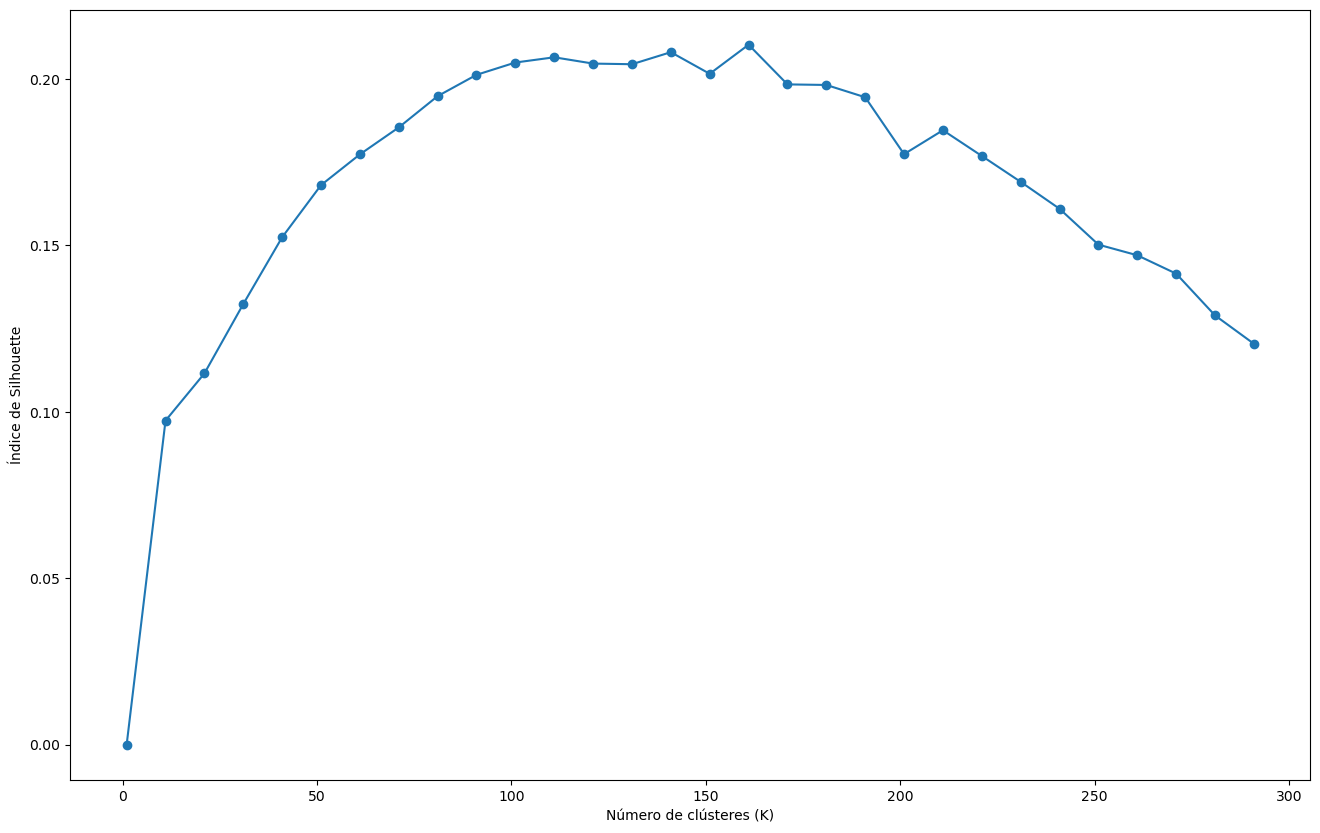

In [322]:
plt.figure(figsize=(16, 10)) 
plt.plot(range(1, 301,10), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

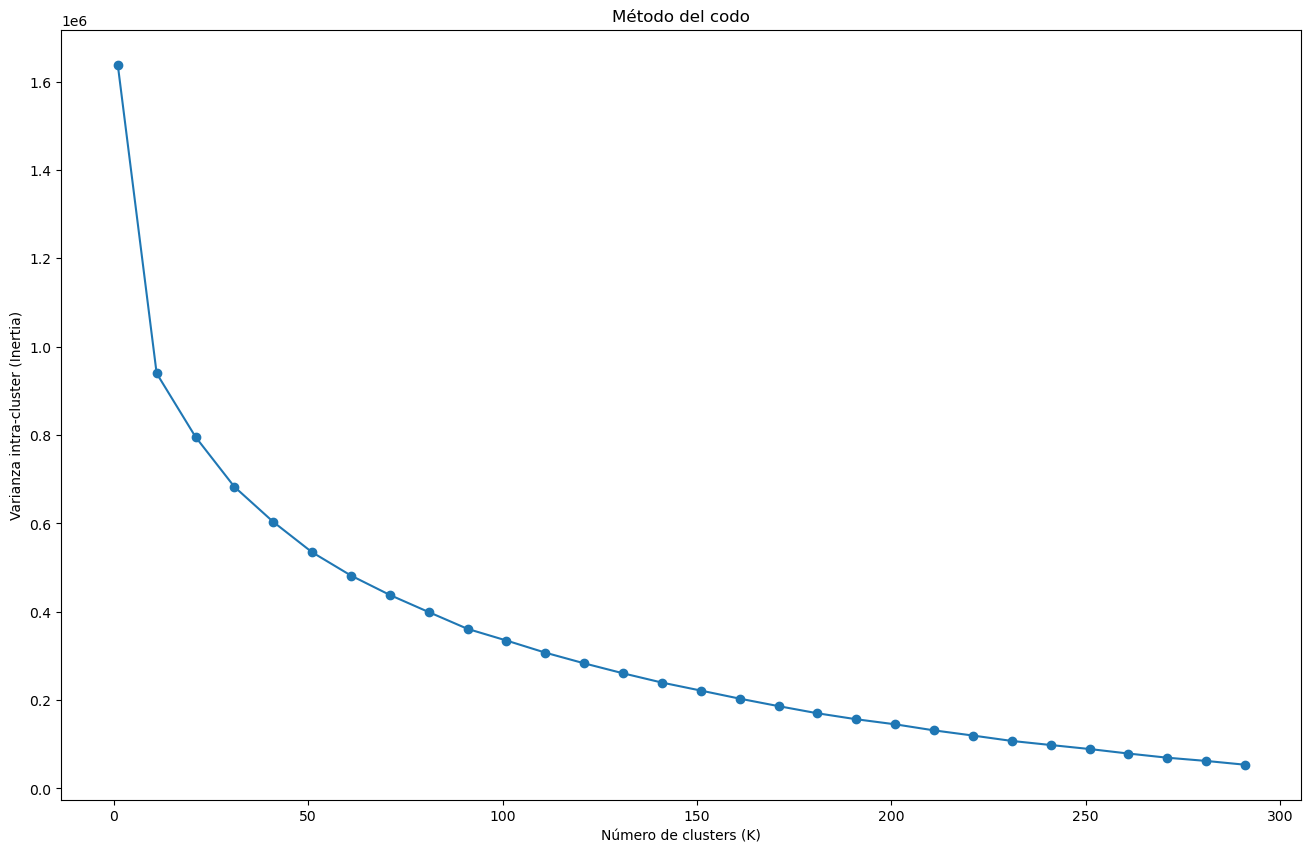

In [324]:
plt.figure(figsize=(16,10))
plt.plot(range(1, 301, 10), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Varianza intra-cluster (Inertia)')
plt.title("Método del codo")
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)